In this post, we will examine the effect of rerolls on some of the algorithms mentioned in the previous three posts:

* Algorithm 27- Roll 2d6, Reroll 1s, Add 6, Take the Sum, Repeat 6 Times
* Algorithm 28- Roll 2d6, Reroll 1s and 2s, Add 6, Take the Sum, Repeat 6 Times
* Algorithm 29- Roll 2d6, Reroll 1s, Add 6, Take the Sum, Repeat 7 Times, Drop Lowest
* Algorithm 30- Roll 2d6, Reroll 1s and 2s, Add 6, Take the Sum, Repeat 7 Times, Drop Lowest
* Algorithm 31- Roll 3d6, Reroll 1s, Take the Sum, Repeat 6 Times
* Algorithm 32- Roll 3d6, Reroll 1s and 2s, Take the Sum, Repeat 6 Times
* Algorithm 33- Roll 3d6, Reroll 1s, Take the Sum, Repeat 7 Times, Drop Lowest
* Algorithm 34- Roll 3d6, Reroll 1s and 2s, Take the Sum, Repeat 7 Times, Drop Lowest
* Algorithm 35- Roll 4d6, Reroll 1s, Drop Lowest, Take the Sum, Repeat 6 Times
* Algorithm 36- Roll 4d6, Reroll 1s and 2s, Drop Lowest, Take the Sum, Repeat 6 Times
* Algorithm 37- Roll 4d6, Reroll 1s, Drop Lowest, Take the Sum, Repeat 7 Times, Drop Lowest
* Algorithm 38- Roll 4d6, Reroll 1s and 2s, Drop Lowest, Take the Sum, Repeat 7 Times, Drop Lowest

Also, the "pbe" algorithm in the code should be in a final, usable form, so that you can import it into your own Python code to run. It will be able to solve any of the algorithms in all four posts. Refer to the docstring for help with parameters.

In [1]:
# Refer to previous posts for more information
import numpy as np
import seaborn as sns
from random import randint
from scipy.stats import norm
from heapq import nlargest
import matplotlib.pyplot as plt
from tabulate import tabulate
vmap = {3:-16, 4:-12, 5:-9, 6:-6, 7:-4, 8:-2, 
        9:-1, 10:0, 11:1, 12:2, 13:3, 14:5, 
        15:7, 16:10, 17:13, 18:17}
% matplotlib inline

def pbe(num_hist, num_dice, dice_type, num_reps, num_nest=1, 
        add_val=0, reroll=0, drop_low_dice=False, 
        drop_low_rep=False):
    """
    pbe
    Point Buy Equivalent
    ~~~~~~~~~~~~~~~~~~~~
    Runs a Monte Carlo simulation to determine the equivalent
    Point Buy of a dice rolling algorithm.
    
    :param num_hist- The number of Monte Carlo histories to
        run. Suggest at least 10**5.
    :param num_dice- The number of dice to roll (i.e. this is
        the "3" in "3d6")
    :param dice_type- The type of dice to roll (i.e. six-sided,
        eight-sided, etc. This is the "6" in "3d6")
    :param num_reps- The number of times to repeat the dice
        roll. If you select more than 6, suggest that you
        also select drop_low_rep=True
    :param num_nest- The number of times to repeat the entire
        algorithm. This is usually "1".
    :param add_value- The value to add to the dice roll. (i.e. 
        this is the "8" in "1d10+8")
    :param reroll- Which dice should be rerolled, cumulatively. 
        E.g. "0" is no rerolls, "1" is rerolls 1s, and "2" is 
        rerolls 1s and 2s.
    :param drop_low_dice- If you select more than 3 dice to roll
        for the six-sided dice, this will drop down the number
        of dice so they equal 3.
    :param drop_low_rep- This will drop the total number of 
        repetitions so that they equal 6.
        
    :returns the raw value array, the point buy equivalent array 
    """
    
    raw_res = []
    val_res = []
    for _ in range(num_hist):
        inst_raw = []
        inst_val = []
        for _ in range(num_nest):
            roll_sums = []
            # Repeat the dice rolling [num_reps] time (Part D)
            for _ in range(num_reps):
                # Part A- Roll [num_dice] dice
                rolls = [randint(reroll+1,dice_type) 
                         for _ in range(num_dice)]
                # Part B- Modify the dice roll
                if drop_low_dice:
                    rolls = nlargest(3,rolls)
                # Part C- Sum the values
                roll_sums.append(sum(rolls)+add_val)
            # Part E- Modify the repetitions
            if drop_low_rep:
                roll_sums = nlargest(6,roll_sums)
            # Part Fa- Find the average raw value and save to the raw_res
            avg_roll_sums = np.median(roll_sums)
            inst_raw.append(avg_roll_sums)
            # Part Fb- Find the Point Buy value and save to the val_res
            point_buy_sum = np.sum([vmap[value] for value in roll_sums])
            inst_val.append(point_buy_sum)           
        ind = np.argmax(inst_val)    
        raw_res.append(inst_raw[ind])  
        val_res.append(inst_val[ind])
    return raw_res, val_res

def plot_hist(raw_data, val_data, title, bins):
    f,(ax1,ax2) = plt.subplots(1, 2, figsize=(8,5))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.suptitle(title, fontsize=14)
    sns.distplot(raw_data, kde=False, bins=bins, fit=norm, ax=ax1)       
    ax1.text(0.05, 0.95, build_text(raw_data), transform=ax1.transAxes, 
             fontsize=12, verticalalignment='top', bbox=props)
    ax1.set_xlabel('Raw Results')   
    ax1.set_ylabel('Probability')
    ax1.set_xlim([3,18])
    sns.distplot(val_data, kde=False, fit=norm, ax=ax2)    
    ax2.text(0.05, 0.95, build_text(val_data), transform=ax2.transAxes, 
             fontsize=12, verticalalignment='top', bbox=props)
    ax2.set_xlabel('Equivalent Point Buy')
    
def build_text(data):
    ret_string = '$\mu$={:.1f}\n$\sigma$={:.2f}\n95%={:.0f}\n5%={:.0f}'.format(
                 np.mean(data), np.std(data), np.percentile(data,95), 
                 np.percentile(data,5))
    return ret_string

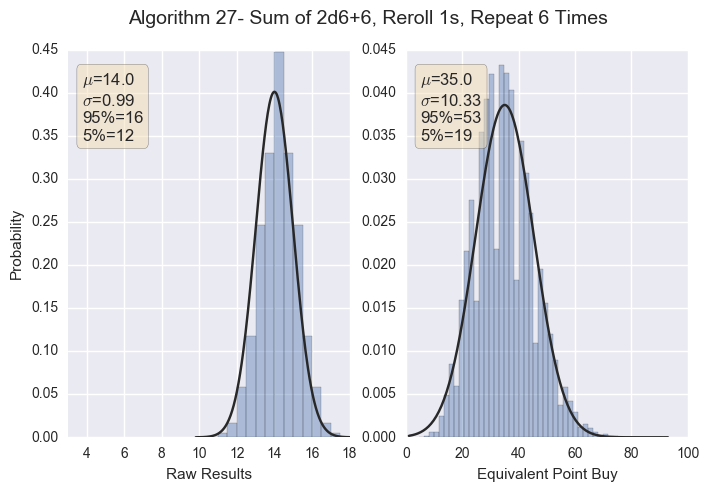

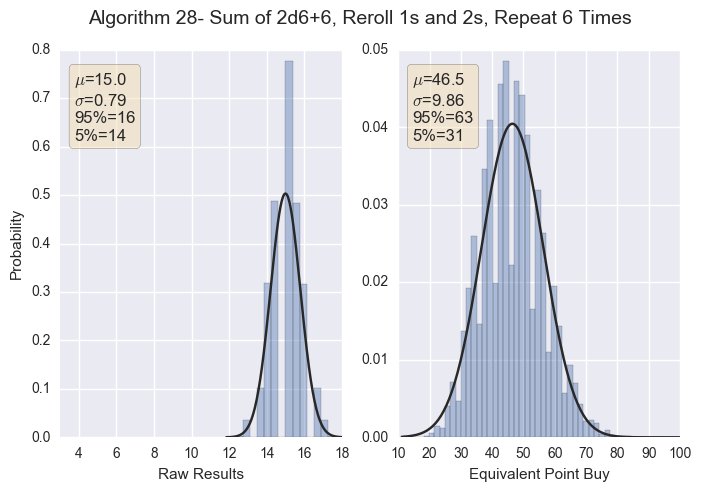

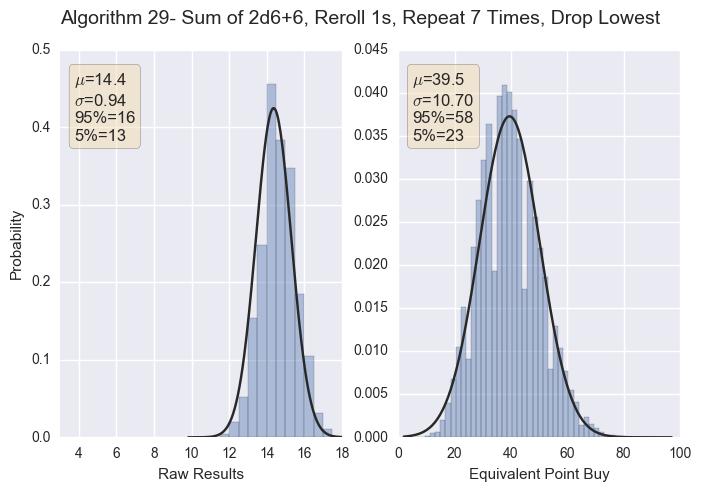

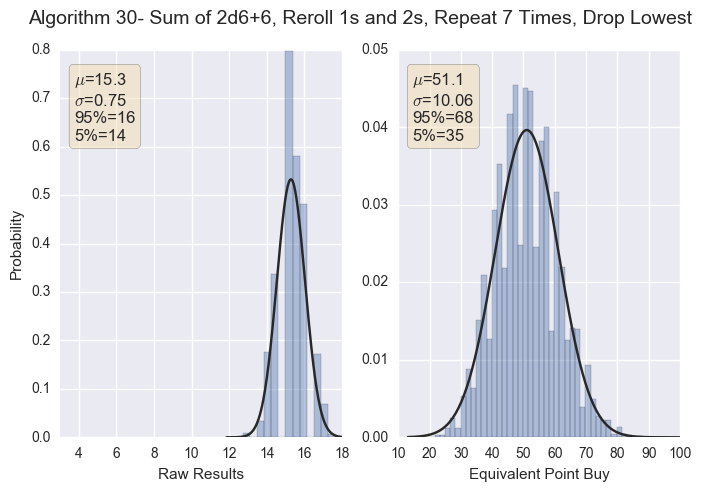

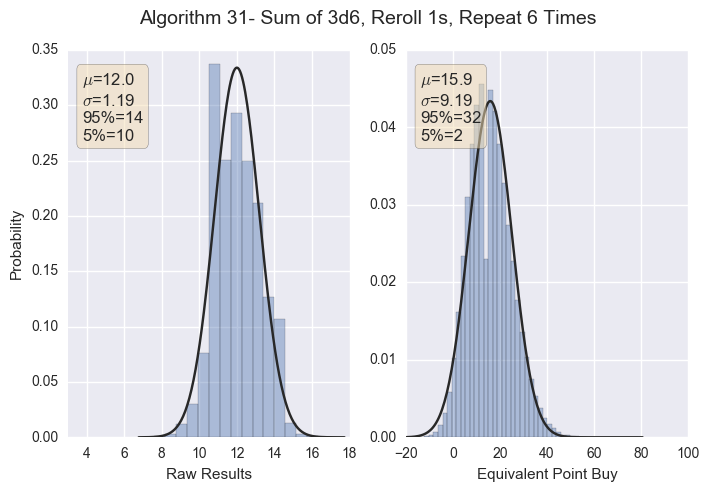

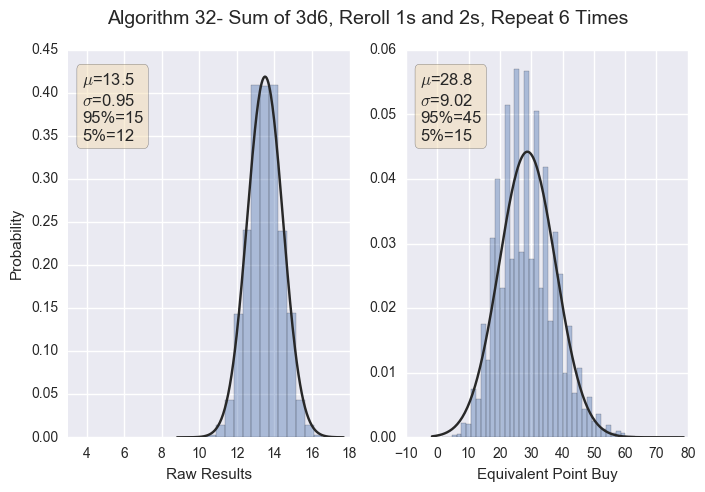

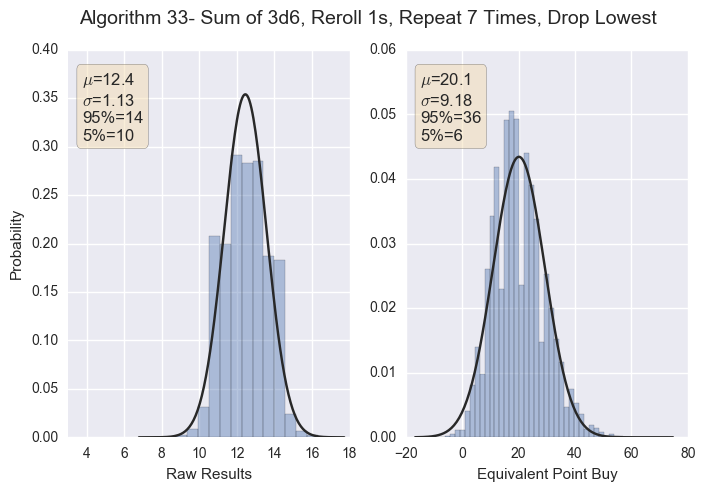

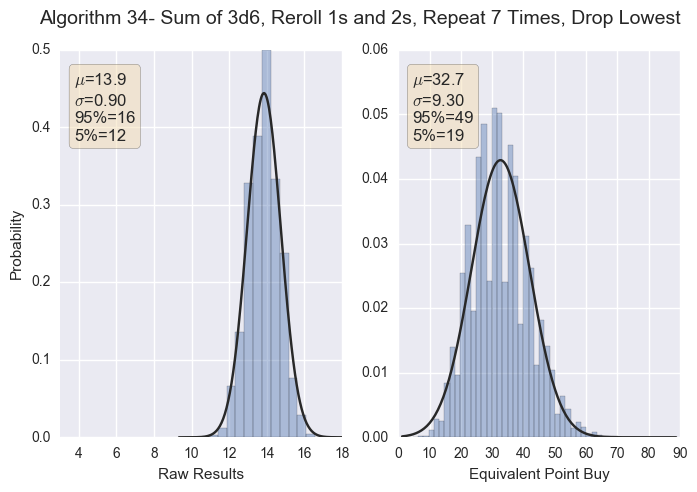

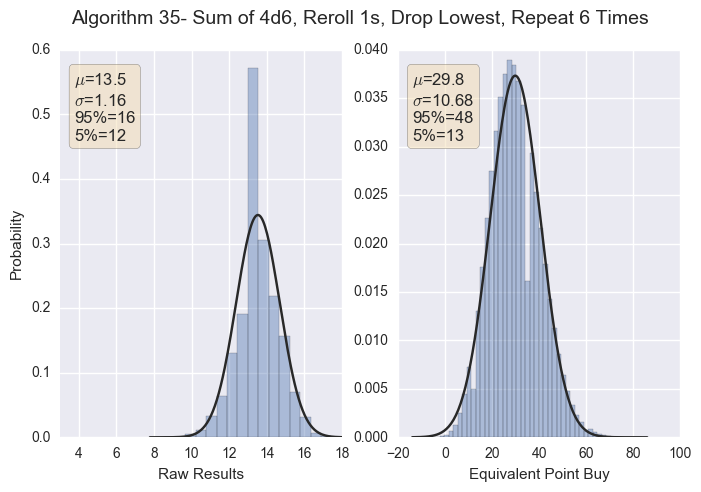

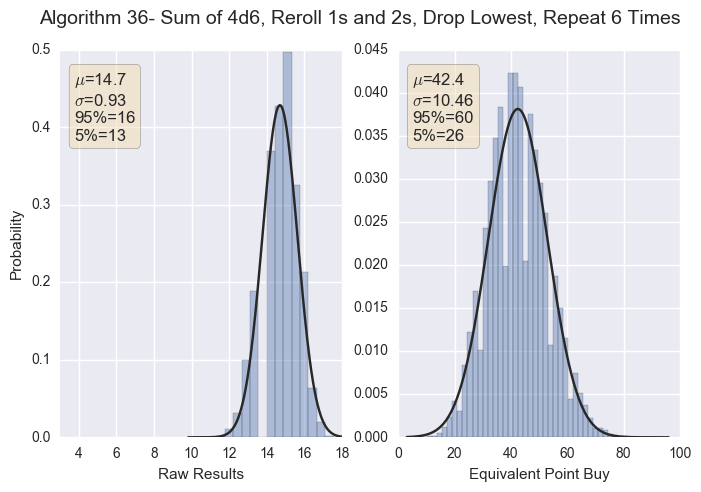

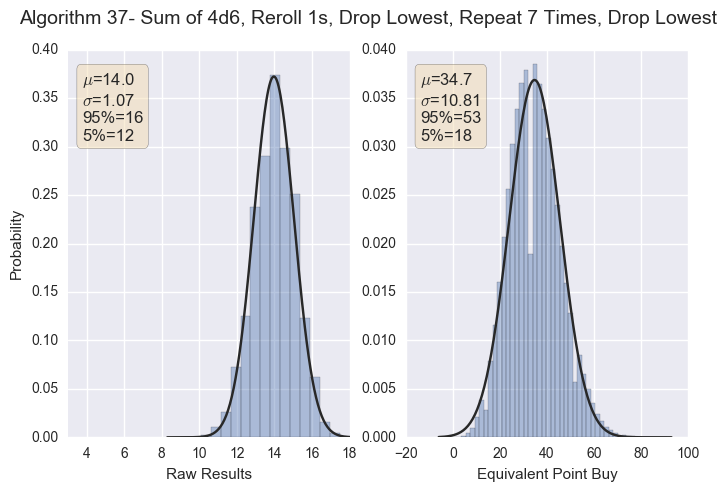

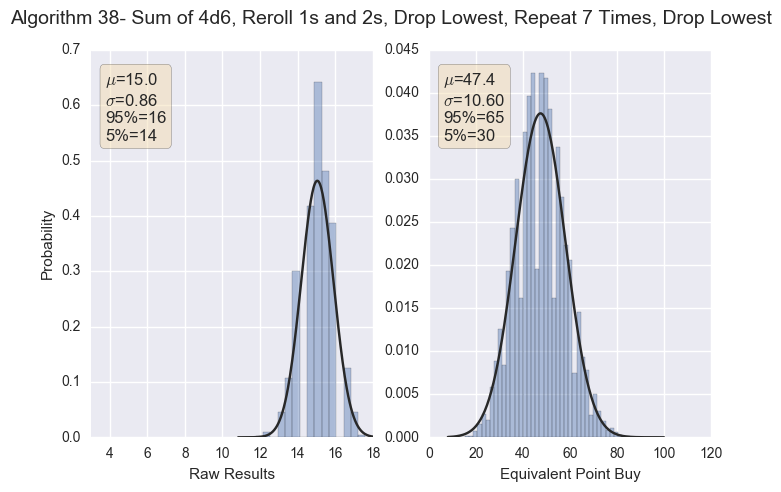

In [2]:
num_hist = 10**6
alg1_raw, alg1_val = pbe(num_hist,2,6,6,add_val=6,reroll=1)
alg2_raw, alg2_val = pbe(num_hist,2,6,6,add_val=6,reroll=2)
alg3_raw, alg3_val = pbe(num_hist,2,6,7,drop_low_rep=True,
                         add_val=6,reroll=1)
alg4_raw, alg4_val = pbe(num_hist,2,6,7,drop_low_rep=True,
                         add_val=6,reroll=2)
alg5_raw, alg5_val = pbe(num_hist,3,6,6,reroll=1)
alg6_raw, alg6_val = pbe(num_hist,3,6,6,reroll=2)
alg7_raw, alg7_val = pbe(num_hist,3,6,7,reroll=1,drop_low_rep=True)
alg8_raw, alg8_val = pbe(num_hist,3,6,7,reroll=2,drop_low_rep=True)
alg9_raw, alg9_val = pbe(num_hist,4,6,6,reroll=1,drop_low_dice=True)
alg10_raw, alg10_val = pbe(num_hist,4,6,6,reroll=2,drop_low_dice=True)
alg11_raw, alg11_val = pbe(num_hist,4,6,7,reroll=1,
                           drop_low_dice=True,drop_low_rep=True)
alg12_raw, alg12_val = pbe(num_hist,4,6,7,reroll=2,
                           drop_low_dice=True,drop_low_rep=True)
plot_hist(alg1_raw, alg1_val,"Algorithm 27- Sum of 2d6+6, Reroll 1s, "+
          "Repeat 6 Times", 16)
plot_hist(alg2_raw, alg2_val,"Algorithm 28- Sum of 2d6+6, Reroll 1s and 2s, "+
          "Repeat 6 Times", 16)
plot_hist(alg3_raw, alg3_val,"Algorithm 29- Sum of 2d6+6, Reroll 1s, "+
          "Repeat 7 Times, Drop Lowest", 16)
plot_hist(alg4_raw, alg4_val,"Algorithm 30- Sum of 2d6+6, Reroll 1s and 2s, "+
          "Repeat 7 Times, Drop Lowest", 16)
plot_hist(alg5_raw, alg5_val,"Algorithm 31- Sum of 3d6, Reroll 1s, "+
          "Repeat 6 Times", 18)
plot_hist(alg6_raw, alg6_val,"Algorithm 32- Sum of 3d6, Reroll 1s and 2s, "+
          "Repeat 6 Times", 18)
plot_hist(alg7_raw, alg7_val,"Algorithm 33- Sum of 3d6, Reroll 1s, "+
          "Repeat 7 Times, Drop Lowest", 18)
plot_hist(alg8_raw, alg8_val,"Algorithm 34- Sum of 3d6, Reroll 1s and 2s, "+
          "Repeat 7 Times, Drop Lowest", 18)
plot_hist(alg9_raw, alg9_val,"Algorithm 35- Sum of 4d6, Reroll 1s, "+
          "Drop Lowest, Repeat 6 Times", 18)
plot_hist(alg10_raw, alg10_val,"Algorithm 36- Sum of 4d6, Reroll 1s and 2s, "+
          "Drop Lowest, Repeat 6 Times", 18)
plot_hist(alg11_raw, alg11_val,"Algorithm 37- Sum of 4d6, Reroll 1s, "+
          "Drop Lowest, Repeat 7 Times, Drop Lowest", 18)
plot_hist(alg12_raw, alg12_val,"Algorithm 38- Sum of 4d6, Reroll 1s and 2s, "+
          "Drop Lowest, Repeat 7 Times, Drop Lowest", 18)

In [3]:
from tabulate import tabulate
def br(data, description):
    return [description, round(np.mean(data),1), round(np.std(data),2), 
            int(np.percentile(data,5)), int(np.percentile(data,95))]
raw_res = [["Description","Mean","Std","5%","95%"],
           br(alg1_raw, "27. Sum 2d6+6, RR 1s, Repeat 6"),
           br(alg2_raw, "28. Sum 2d6+6, RR 1s/2s, Repeat 6"),
           br(alg3_raw, "29. Sum 2d6+6, RR 1s, Repeat 7, Drop 1"),
           br(alg4_raw, "30. Sum 2d6+6, RR 1s/2s, Repeat 7, Drop 1"),
           br(alg5_raw, "31. Sum 3d6, RR 1s, Repeat 6"),
           br(alg6_raw, "32. Sum 3d6, RR 1s/2s, Repeat 6"),
           br(alg7_raw, "33. Sum 3d6, RR 1s, Repeat 7, Drop 1"),
           br(alg8_raw, "34. Sum 3d6, RR 1s/2s, Repeat 7, Drop 1"),
           br(alg9_raw, "35. Sum 4d6, Drop 1, RR 1s, Repeat 6"),
           br(alg10_raw, "36. Sum 4d6, Drop 1, RR 1s/2s, Repeat 6"),
           br(alg11_raw, "37. Sum 4d6, Drop 1, RR 1s, Repeat 7, Drop 1"),
           br(alg12_raw, "38. Sum 4d6, Drop 1, RR 1s/2s, Repeat 7, Drop 1")]
print("Raw Results")
print(tabulate(raw_res))
val_res = [["Description","Mean","Std","5%","95%"],
           br(alg1_val, "27. Sum 2d6+6, RR 1s, Repeat 6"),
           br(alg2_val, "28. Sum 2d6+6, RR 1s/2s, Repeat 6"),
           br(alg3_val, "29. Sum 2d6+6, RR 1s, Repeat 7, Drop 1"),
           br(alg4_val, "30. Sum 2d6+6, RR 1s/2s, Repeat 7, Drop 1"),
           br(alg5_val, "31. Sum 3d6, RR 1s, Repeat 6"),
           br(alg6_val, "32. Sum 3d6, RR 1s/2s, Repeat 6"),
           br(alg7_val, "33. Sum 3d6, RR 1s, Repeat 7, Drop 1"),
           br(alg8_val, "34. Sum 3d6, RR 1s/2s, Repeat 7, Drop 1"),
           br(alg9_val, "35. Sum 4d6, Drop 1, RR 1s, Repeat 6"),
           br(alg10_val, "36. Sum 4d6, Drop 1, RR 1s/2s, Repeat 6"),
           br(alg11_val, "37. Sum 4d6, Drop 1, RR 1s, Repeat 7, Drop 1"),
           br(alg12_val, "38. Sum 4d6, Drop 1, RR 1s/2s, Repeat 7, Drop 1")]
print("\nEquivalent Point Buy")
print(tabulate(val_res))

Raw Results
-----------------------------------------------  ----  ----  --  ---
Description                                      Mean  Std   5%  95%
27. Sum 2d6+6, RR 1s, Repeat 6                   14.0  0.99  12  15
28. Sum 2d6+6, RR 1s/2s, Repeat 6                15.0  0.79  13  16
29. Sum 2d6+6, RR 1s, Repeat 7, Drop 1           14.4  0.94  13  16
30. Sum 2d6+6, RR 1s/2s, Repeat 7, Drop 1        15.3  0.75  14  16
31. Sum 3d6, RR 1s, Repeat 6                     12.0  1.19  10  14
32. Sum 3d6, RR 1s/2s, Repeat 6                  13.5  0.95  12  15
33. Sum 3d6, RR 1s, Repeat 7, Drop 1             12.4  1.13  10  14
34. Sum 3d6, RR 1s/2s, Repeat 7, Drop 1          13.9  0.9   12  15
35. Sum 4d6, Drop 1, RR 1s, Repeat 6             13.5  1.16  11  15
36. Sum 4d6, Drop 1, RR 1s/2s, Repeat 6          14.7  0.93  13  16
37. Sum 4d6, Drop 1, RR 1s, Repeat 7, Drop 1     14.0  1.07  12  15
38. Sum 4d6, Drop 1, RR 1s/2s, Repeat 7, Drop 1  15.0  0.86  13  16
----------------------------------

### Interpretation
Accumulating the results from all 3 previous blog posts, we end up with:

**5-Point Buy**
* Sum of 3d6, Repeat 6

**10-Point Buy**
* Sum of 3d6, Repeat 7, Drop 1
* (Low Variance) [Sum of 3d6, Repeat 6], Repeat 3
* (High Variance) Sum of 2d8+2, Repeat 6

**15-Point Buy**
* Sum of 3d6, Repeat 9, Drop 3
* (Low Variance) Sum of 4d4+2, Repeat 6
* (Low Variance) [Sum of 3d6, Repeat 6], Repeat 6
* (Low Variance) [Sum of 3d6, Repeat 7, Drop 1], Repeat 3
* (Low Variance) Sum of 3d6, Reroll 1s, Repeat 6
* (High Variance) Sum of 2d8+2, Repeat 7, Drop 1

**20-Point Buy**
* Sum of 4d6, Drop 1, Repeat 6
* (Low Variance) Sum of 4d4+2, Repeat 7, Drop 1
* (Low Variance) [Sum of 3d6, Repeat 7, Drop 1], Repeat 6
* (Low Variance) Sum of 3d6, Reroll 1s, Repeat 7, Drop 1

**25-Point Buy**
* Sum of 4d6, Drop 1, Repeat 7, Drop 1
* Sum of 2d6, Add 6, Repeat 6
* (High Variance) Sum of 1d12+6, Repeat 6

**30-Point Buy**
* Sum of 5d6, Drop 2, Repeat 6
* (Low Variance) Sum of 3d4+6, Repeat 6
* (Low Variance) [Sum of 4d6, Drop 1, Repeat 6], Repeat 3
* (Low Variance) Sum of 3d6, Reroll 1s/2s, Repeat 6
* (Low Variance) Sum of 4d6, Drop 1, Reroll 1s, Repeat 6

**35-Point Buy**
* (Low Variance) [Sum of 4d6, Drop 1, Repeat 6], Repeat 6
* (Low Variance) [Sum of 4d6, Drop 1, Repeat 7, Drop 1], Repeat 3
* (Low Variance) Sum of 2d6+6, Reroll 1s, Repeat 6
* (Low Variance) Sum of 3d6, Reroll 1s/2s, Repeat 7, Drop 1
* (Low Variance) Sum of 4d6, Drop 1, Reroll 1s, Repeat 6
* (High Variance) Sum of 1d10+8, Repeat 6

**40-Point Buy**
* (Low Variance) [Sum of 4d6, Drop 1, Repeat 7, Drop 1], Repeat 6
* (Low Variance) [Sum of 5d6, Drop 2, Repeat 6], Repeat 3
* (Low Variance) Sum of 2d6+6, Reroll 1s, Repeat 7, Drop 1
* (Low Variance) Sum of 4d6, Drop 1, Reroll 1s/2s, Repeat 6

**45-Point Buy**
* (Low Variance) Sum of 2d4+10, Repeat 6
* (Low Variance) [Sum of 5d6, Drop 2, Repeat 6], Repeat 6
* (Low Variance) Sum of 2d6+6, Reroll 1s/2s, Repeat 6
* (High Variance) Sum of 1d8+10, Repeat 6

**50-Point Buy**
* (Low Variance) Sum of 2d6+6, Reroll 1s/2s, Repeat 7, Drop 1
* (Low Variance) Sum of 4d6, Drop 1, Reroll 1s/2s, Repeat 6

"XdY+Z" should be interpreted as "Roll X dice with Y sides, and add Z to the total". Parts in brackets indicate that the entire algorithm should be repeated. For instance, "[Sum of 3d6, Repeat 7, Drop 1], Repeat 6" means "Repeat the [Sum of 3d6, Repeat 7, Drop 1] algorithm 6 times." Yes, I should have used two layers of brackets here for precision, but it looked more confusing in my opinion. "Low Variance" and "High Variance" are relative comparisons with the seven most common algorithms from Part 1.

Remember: If you're allowing players to individually decide whether to use Point Buy or random rolling, this table can be consulted to fairly select which method to use. Random rolling is, of course, random, so the player might get values much lower or higher than the equivalent Point Buy above. In general, you probably want to choose the (Low Variance) option for each bucket, if it is available, unless you strongly prefer six-sided dice.